In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-diagnosis-data-insights/Breast_cancer_data.csv


# Problem Statement for Exploratory Data Analysis (EDA)

***Problem Statement: Analysis of Feature Distributions and Their Relationship with Tumor Diagnosis***

# Objective
The objective is to understand the distribution of key features (mean_radius, mean_texture, mean_perimeter, mean_area, mean_smoothness) and analyze how these features differ between benign and malignant tumors. This analysis aims to uncover patterns and insights that will inform the feature selection process and improve the predictive performance of the machine learning model.

## Interpretation of the Data

- **mean_radius:** Helps to understand the typical size of the tumor.
- **mean_texture:** Provides information on the heterogeneity of the tumor's appearance.
- **mean_perimeter:** Another measure of the tumor's size, emphasizing the boundary length.
- **mean_area:** Reflects the overall size of the tumor.
- **mean_smoothness:** Indicates how smooth or irregular the tumor boundary is.
- **diagnosis:** The outcome variable, essential for training a classification model to distinguish between benign and malignant tumors.


In [2]:
import pandas as pd
import numpy as mp 
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from termcolor import colored

# Step 1 : Load Data

In [3]:
df = pd.read_csv("/kaggle/input/breast-cancer-diagnosis-data-insights/Breast_cancer_data.csv")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


# Step 2: Basic Information

In [4]:
# Display few row at the top of data
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [5]:
# Display few row at the buttom level
df.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [6]:
# Display the random row of data
df.sample()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
313,11.54,10.72,73.73,409.1,0.08597,1


In [7]:
# Basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [8]:
# Summary statistics 
df = df.describe()
print(tabulate(df,headers='keys', tablefmt='pretty'))

+-------+--------------------+--------------------+--------------------+-------------------+---------------------+---------------------+
|       |    mean_radius     |    mean_texture    |   mean_perimeter   |     mean_area     |   mean_smoothness   |      diagnosis      |
+-------+--------------------+--------------------+--------------------+-------------------+---------------------+---------------------+
| count |       569.0        |       569.0        |       569.0        |       569.0       |        569.0        |        569.0        |
| mean  | 14.127291739894552 | 19.289648506151142 | 91.96903339191564  | 654.8891036906855 | 0.0963602811950791  | 0.6274165202108963  |
|  std  | 3.5240488262120775 | 4.301035768166949  | 24.298981038754906 | 351.914129181653  | 0.01406412813767362 | 0.48391795640316865 |
|  min  |       6.981        |        9.71        |       43.79        |       143.5       |       0.05263       |         0.0         |
|  25%  |        11.7        |       16.1

In [9]:
# Print the columns list
df.columns.to_list()

['mean_radius',
 'mean_texture',
 'mean_perimeter',
 'mean_area',
 'mean_smoothness',
 'diagnosis']

In [10]:
# Find unique values in the 'diagnosis' column
unique_diagnoses = df['diagnosis'].unique()
print("Unique values in 'diagnosis' column:", unique_diagnoses)

Unique values in 'diagnosis' column: [5.69000000e+02 6.27416520e-01 4.83917956e-01 0.00000000e+00
 1.00000000e+00]


In [11]:
# Describe the DataFrame and transpose the result
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
mean_radius,8.0,82.824043,196.577133,3.524049,10.520250,13.748646,18.862500,569.0
mean_texture,8.0,87.298836,194.903549,4.301036,14.555000,19.064824,26.170000,569.0
mean_perimeter,8.0,147.883502,176.969728,24.298981,67.325000,89.104517,125.200000,569.0
mean_area,8.0,746.800404,735.174749,143.500000,403.203532,560.050000,686.841828,2501.0
mean_smoothness,8.0,71.201749,201.140872,0.014064,0.077935,0.096115,0.119825,569.0
diagnosis,8.0,71.638917,200.964657,0.000000,0.362938,0.813708,1.000000,569.0


In [12]:
# Print the Number of row and columns
row = df.shape[0]
columns = df.shape[1]
print("Number of Row in data :", row)
print("\nNumber of columns in data :", columns)


Number of Row in data : 8

Number of columns in data : 6


In [13]:
# Check the missing values in data
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

# Step 3: Data Cleaning

In [14]:
# Data clean message
missing_value = df.isnull().sum()

if missing_value.sum() == 0:
    print("There is no need to clean data because all data columns are cleaned.")
else:
    print("There are missing values in the dataset.")
    print(missing_value)

There is no need to clean data because all data columns are cleaned.


# Step 4: Univariate Analysis

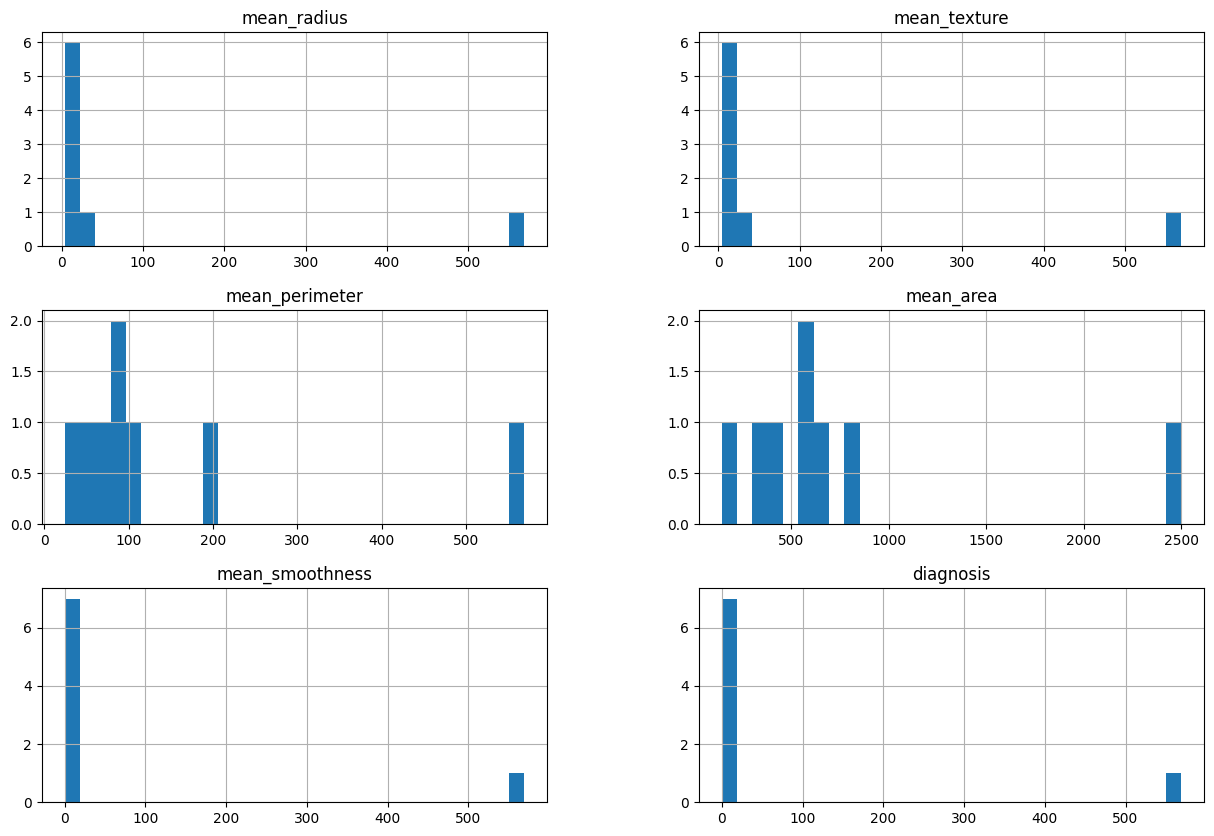

In [15]:
# Histograms for numerical columns
df.hist(bins=30, figsize=(15, 10))
plt.show()

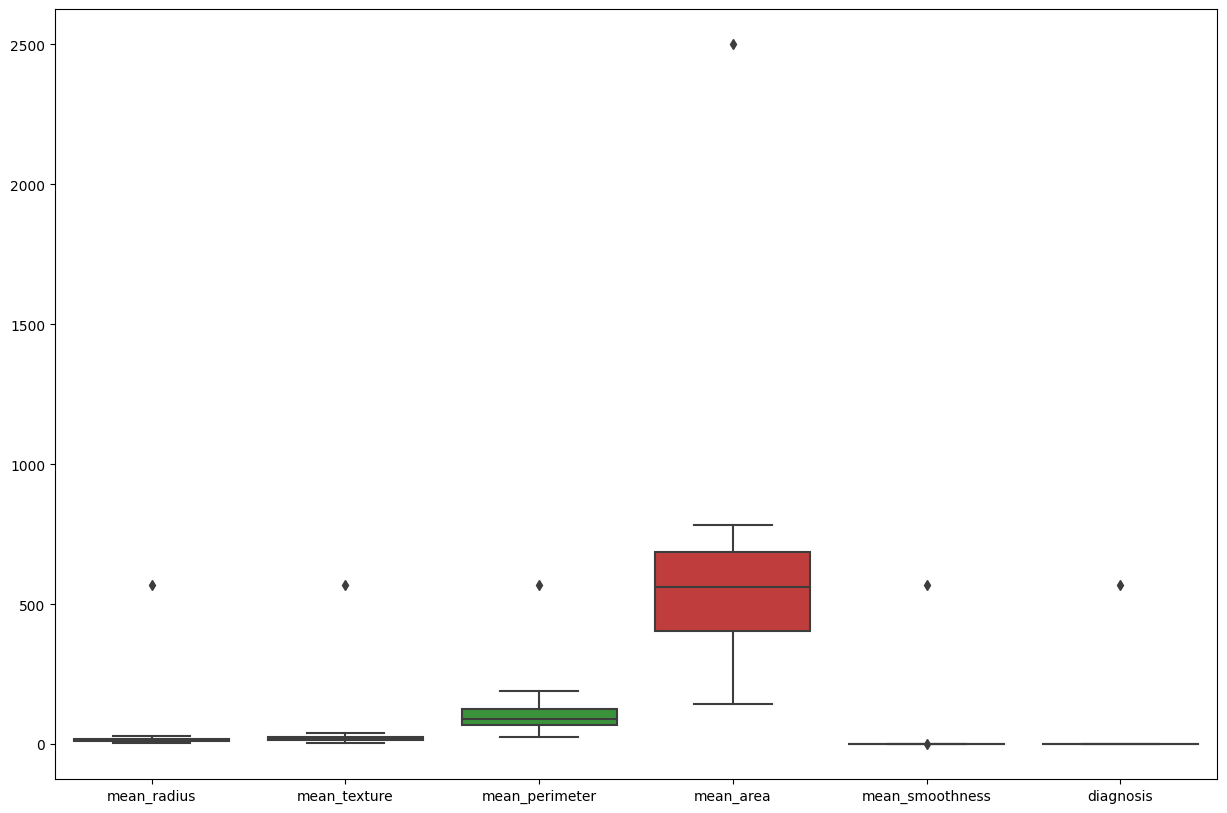

In [16]:
# Box plots for numerical columns
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
plt.show()

# Step 5: Bivariate Analysis

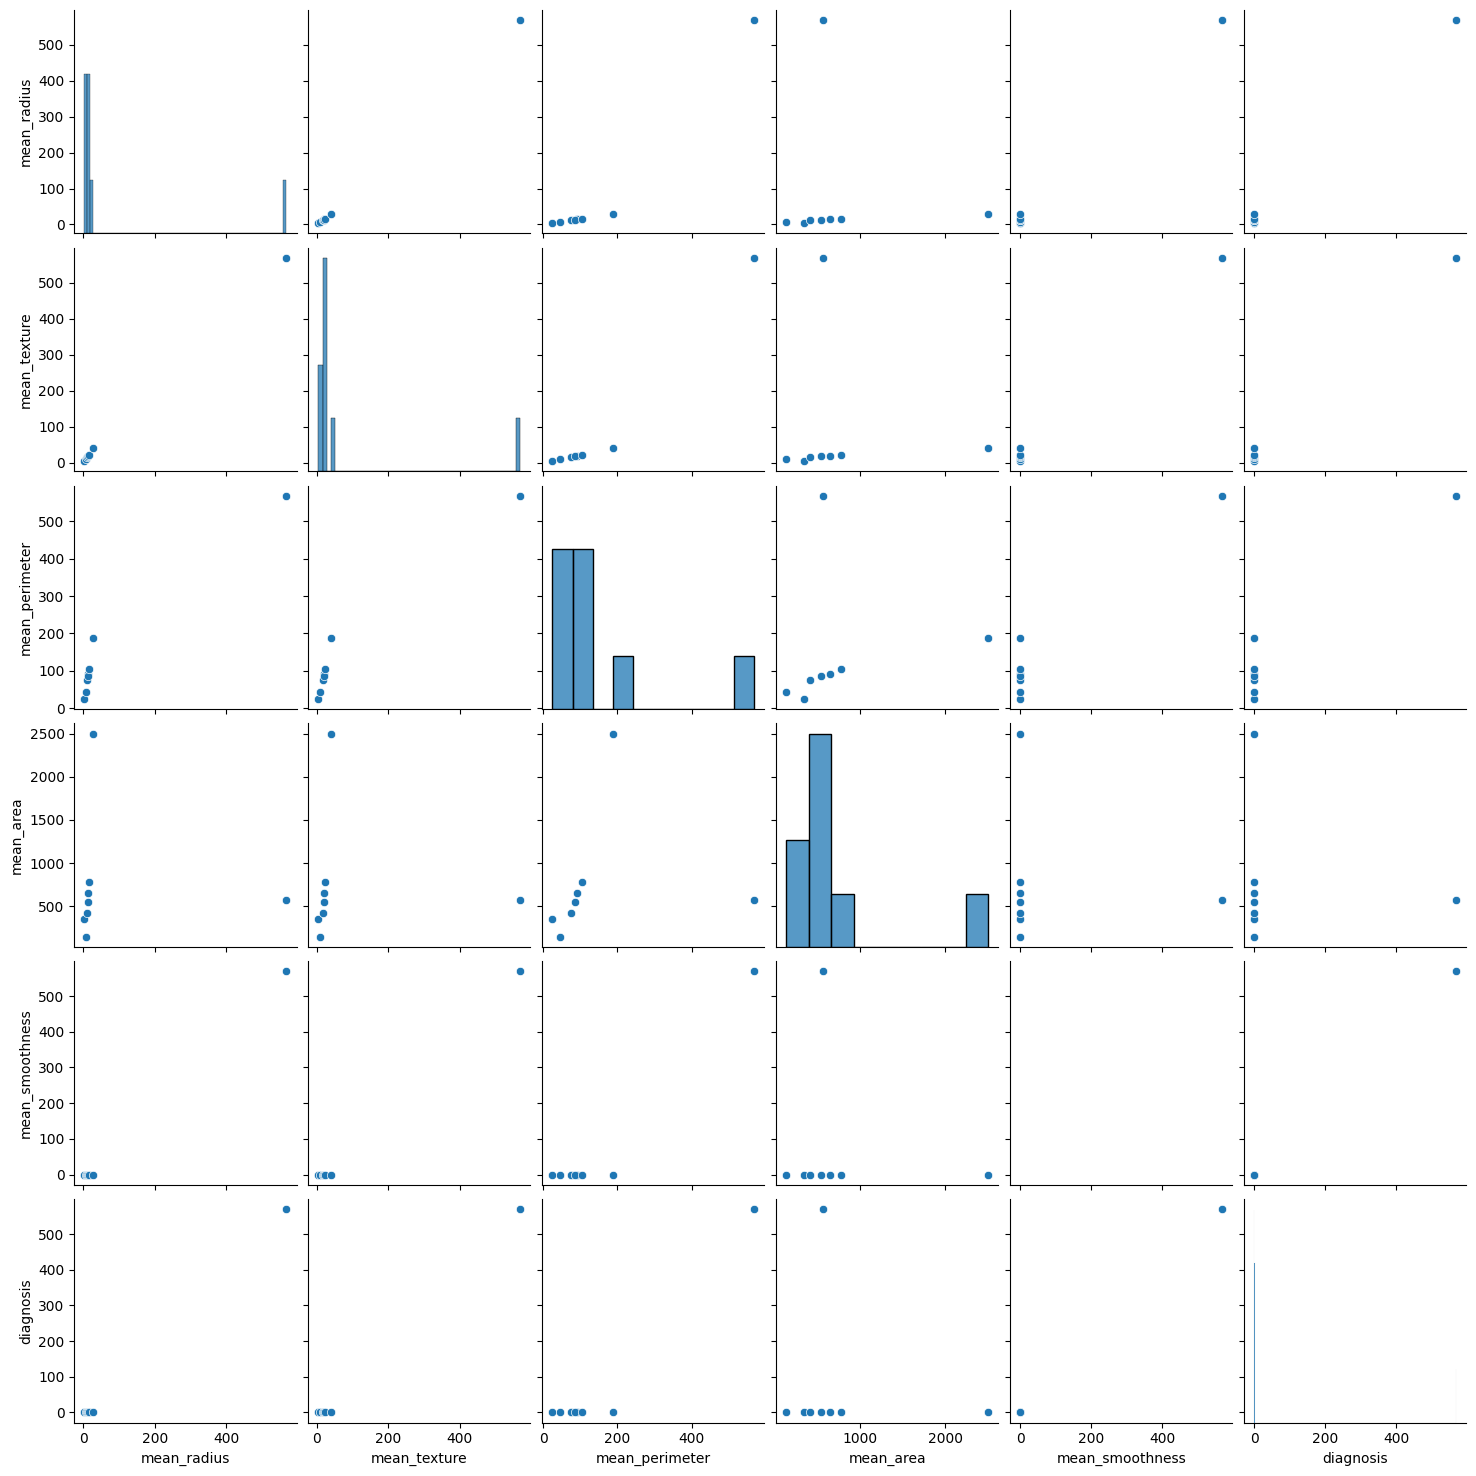

In [17]:
import warnings
warnings.filterwarnings("ignore")

# Scatter plots for numerical columns
sns.pairplot(df)
plt.show()

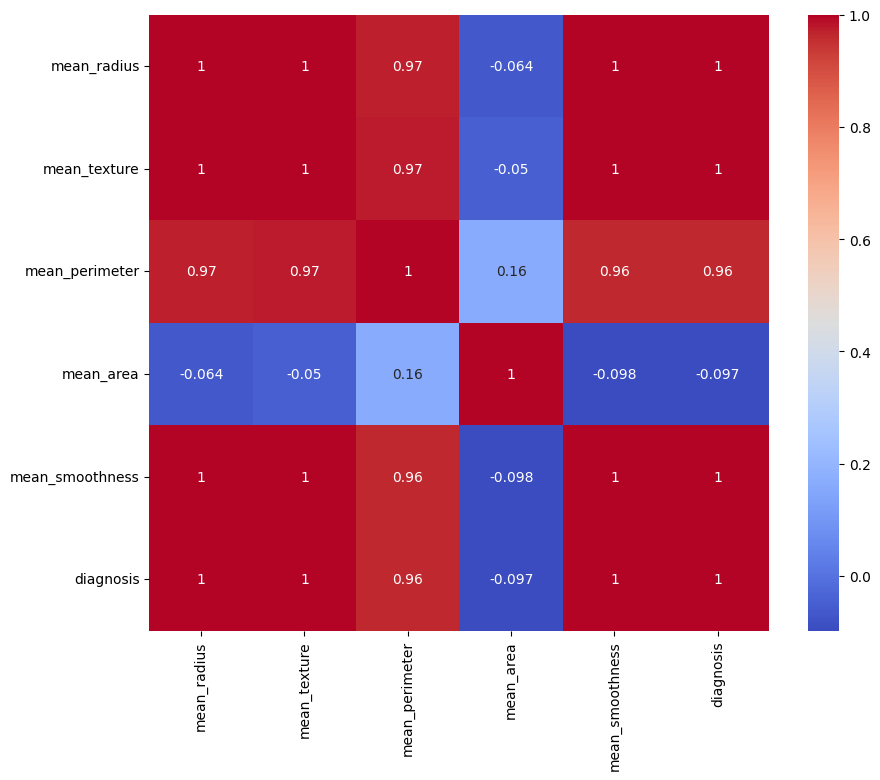

In [18]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Step 6: Multivariate Analysis

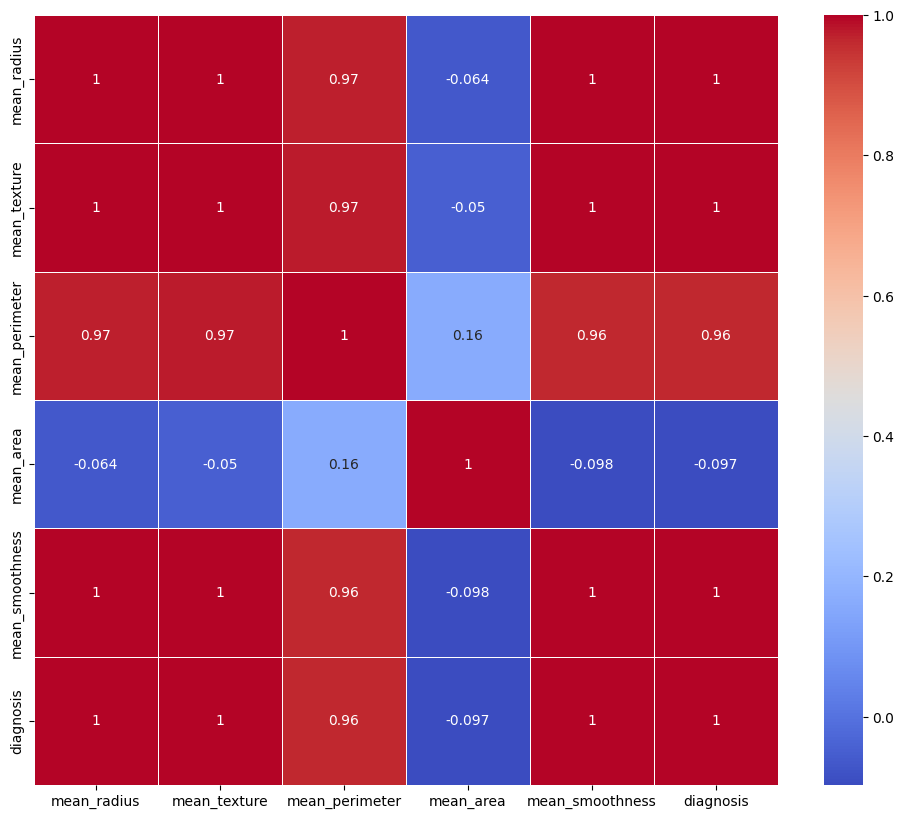

In [19]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

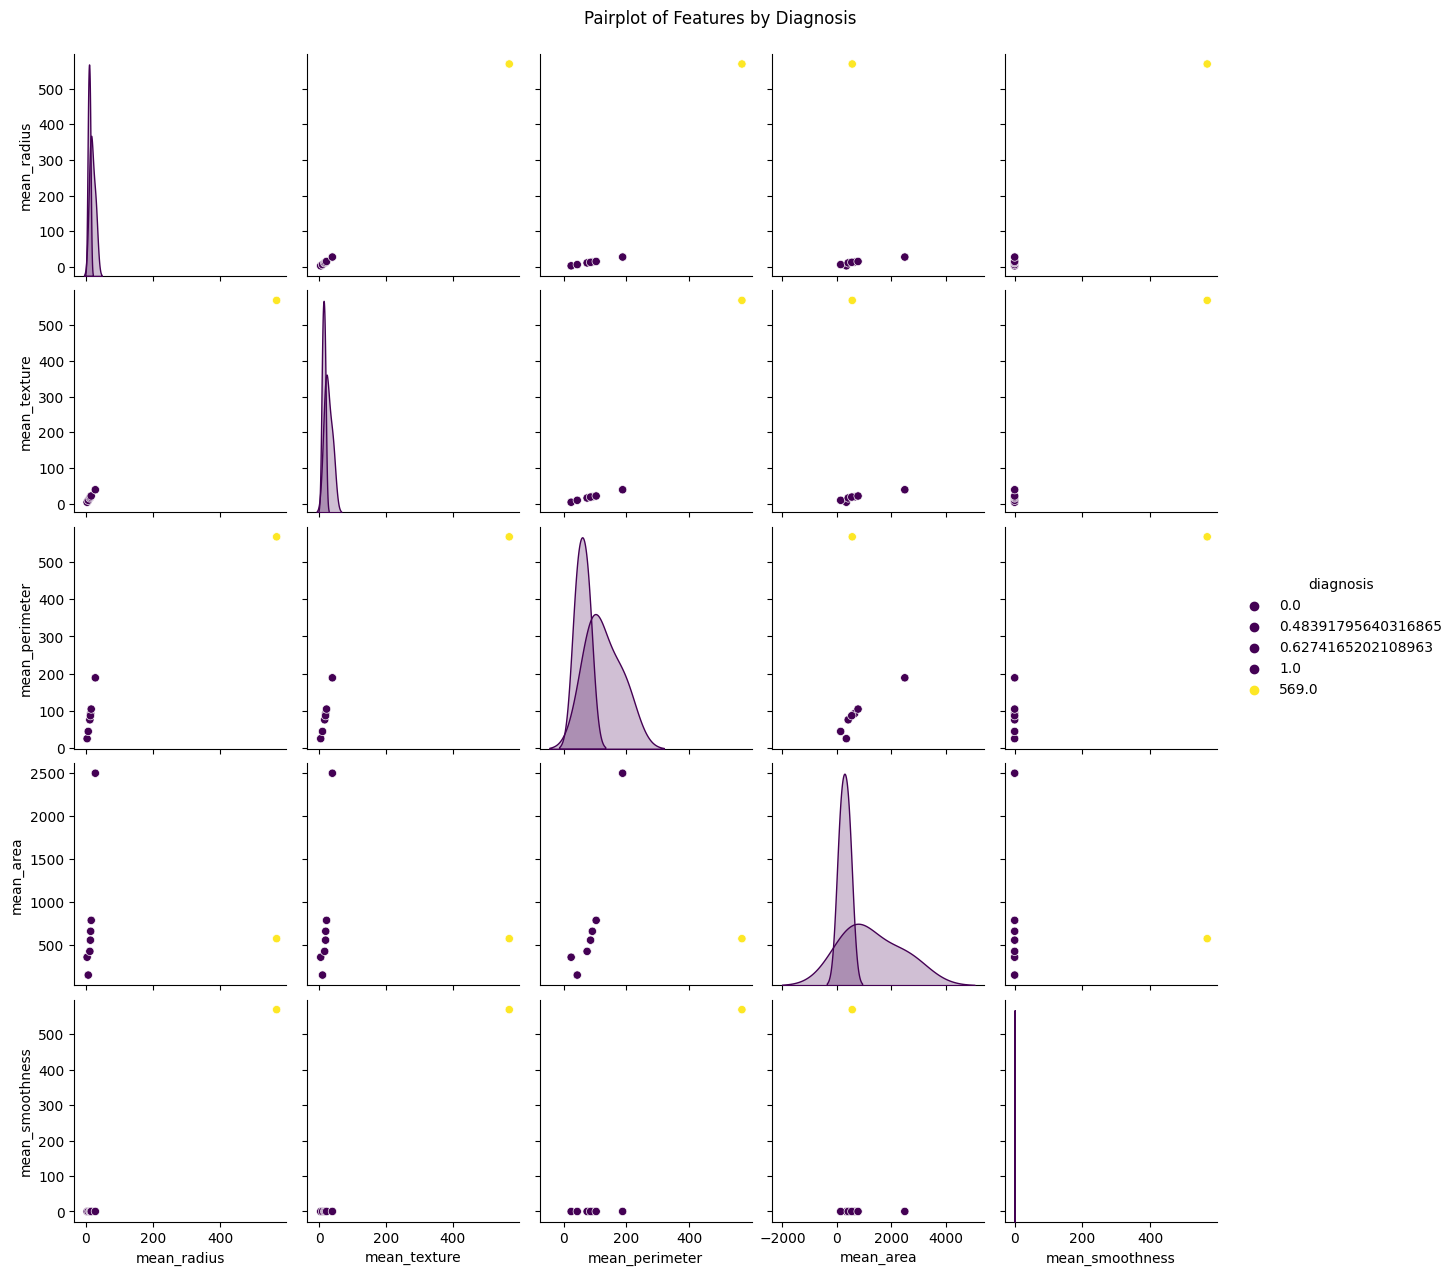

In [20]:
# Feature Interaction Visualization
sns.pairplot(df, hue='diagnosis', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Features by Diagnosis', y=1.02)
plt.show()

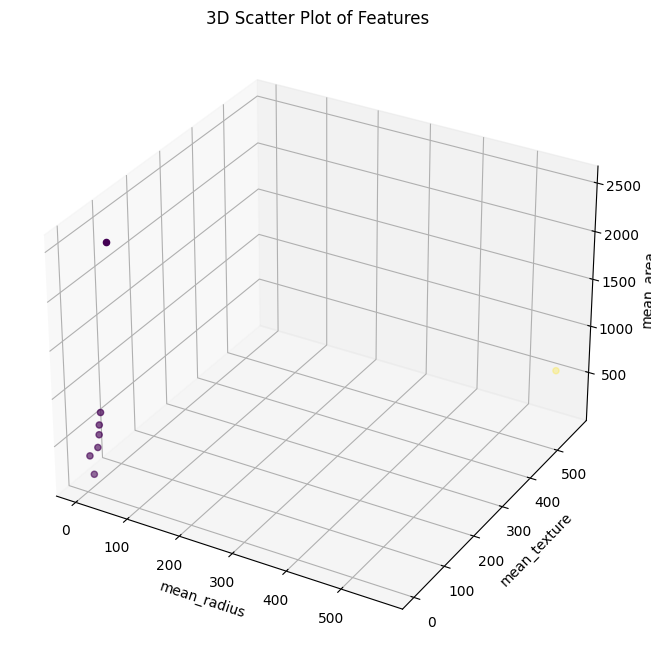

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['mean_radius'], df['mean_texture'], df['mean_area'], c=df['diagnosis'], cmap='viridis')
ax.set_xlabel('mean_radius')
ax.set_ylabel('mean_texture')
ax.set_zlabel('mean_area')
ax.set_title('3D Scatter Plot of Features')
plt.show()